# A MACHINE LEARNING MODEL TO PREDICT WHICH INDIVIDUAL ARE MOST LIKELY TO HAVE OR USE A BANK ACCOUNT

In [85]:
#Import necessary libraries
from datetime import datetime as dt
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
sns.set()
import pandas as pd

In [86]:
#reading the dataset from the system
train = pd.read_csv(r"C:\Users\ABOFFICIAL\Desktop\zindi\tunisia\Train_v2.csv")
test = pd.read_csv(r"C:\Users\ABOFFICIAL\Desktop\zindi\tunisia\Test_V2.csv")
column_definition = pd.read_csv(r"C:\Users\ABOFFICIAL\Desktop\zindi\tunisia\VariableDefinitions.csv")

Note: This is a binary classification problem... Either yes or no, yes =1 and no =0

In [87]:
# keep calm! know the variable definitions and understand each one of thecolumn_definition
column_definition

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [88]:
#lets preview the first 6 of the train data to see how the data looks like
train.head(6)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed


In [89]:
#lets preview the shape of the data(both train and test)
print(train.shape, test.shape)

(23524, 13) (10086, 12)


As it can be seen, For the train data we have 23524 rows and 13 columns and  Test data 10086 rows, 12 columns

In [90]:
#lets preview the different country in the dataset
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [91]:
test.year.value_counts()

2016    3745
2018    3502
2017    2839
Name: year, dtype: int64

In [92]:
train.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

Same pattern! numbers of count descending, the year seems to be respected when splitting the train/test

lets preview the number of counts with respect to the countries

In [93]:
train[train.year==2016].country.value_counts()

Rwanda    8735
Name: country, dtype: int64

In [94]:
train[train.year==2017].country.value_counts()

Tanzania    6620
Name: country, dtype: int64

In [95]:
train[train.year==2018].country.value_counts()

Kenya     6068
Uganda    2101
Name: country, dtype: int64

The year variable is not important, since we can loop through the year with the country or what year it is by the country name

In [96]:
#Describing the train data
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


There are 3 numerical columns in the dataset, others are categorical

In [97]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

As it can be seen, we have only object and int64 data

In [98]:
#checking for missing data in the trainset
train.apply(lambda x: sum(x.isnull()), axis =0)

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [99]:
#checking for missing data in the testset
test.apply(lambda x: sum(x.isnull()), axis =0)

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Cool! There are no missing data for both train and test set

Lets preview the dataset if its balance or not by checking our target distribution

In [100]:
Yes = len(train[train.bank_account =='Yes'])
No = len(train[train.bank_account =='No'])
Total = len(train)
print ('There are imbalanace datset with a %i/%i ratio'%((No/Total*100), (Yes/Total*100)+1))

There are imbalanace datset with a 85/15 ratio


To preserve this ratio in our folds when doing cross validation, stratification(groupby) will be needed

In [101]:
#lets check random examples of counts present in unique id's
train.uniqueid.value_counts().sample(5)

uniqueid_485     4
uniqueid_6133    2
uniqueid_7548    1
uniqueid_3177    3
uniqueid_8614    1
Name: uniqueid, dtype: int64

In [102]:
#lets check random examples of counts present in unique id's
test.uniqueid.value_counts().sample(5)

uniqueid_2963     1
uniqueid_12298    1
uniqueid_11122    1
uniqueid_2788     1
uniqueid_2978     1
Name: uniqueid, dtype: int64

In [103]:
#lets replace categoricial variables to numerical, so that we can have a error free prediction
## target encoding
categorical = {"Yes": 1, "No": 0}
train.replace({"bank_account": categorical},inplace=True)

# EXPLORATORY DATA ANALYSIS

Age of respondent

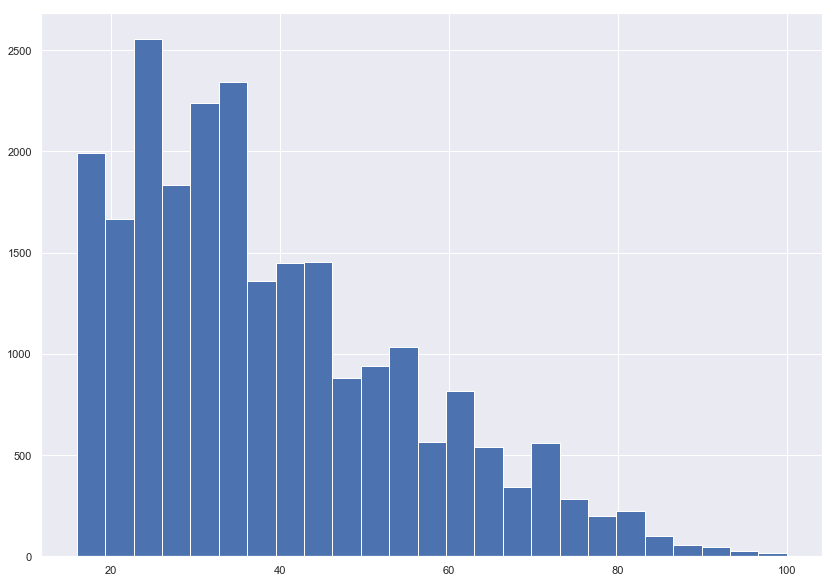

In [104]:
histogram_age =train.age_of_respondent.hist(bins =25, figsize=[14,10])

As it can be seen, we have a skewed to the right distribution for this variable,
lets make it look like a bit more gaussian by applying x to log base 10 of x and square root

In [105]:
log_age = train.age_of_respondent.apply(np.log10)
sqrt_age = train.age_of_respondent.apply(np.sqrt)
log_age_test = test.age_of_respondent.apply(np.log10)
sqrt_age_test= test.age_of_respondent.apply(np.sqrt)

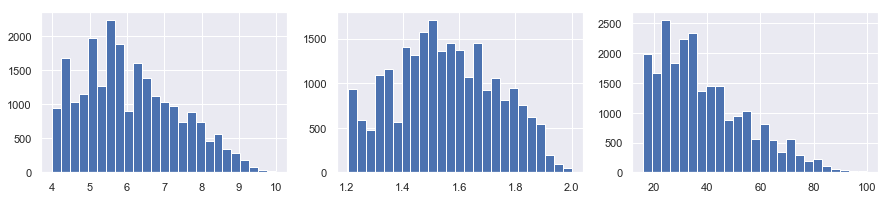

In [106]:
plt.subplot(331)
hist_sqrt_age = sqrt_age.hist(bins=25, figsize=[15,10]) #sqrt histogram

plt.subplot(332)
hist_log_age = log_age.hist(bins=25, figsize=[15,10])#log histogram

plt.subplot(333)
hist_age = train['age_of_respondent'].hist(bins=25, figsize=[15,10])#original distribution

The middle distribution make more sense... i.e the log10

country

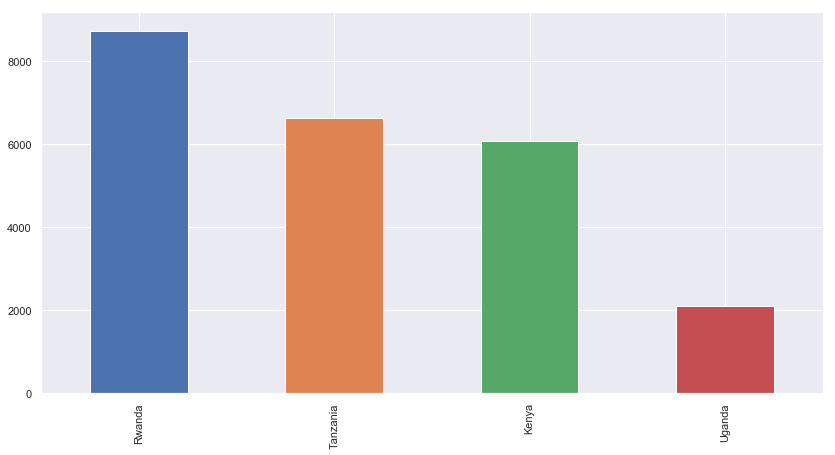

In [107]:
train['country'].value_counts().plot(kind ='bar', figsize=[14,7])

Uganda occurence is the lowest while rwanda has the highest occurence
definetely more data point was gotten from rwanda down to uganda

House hold size

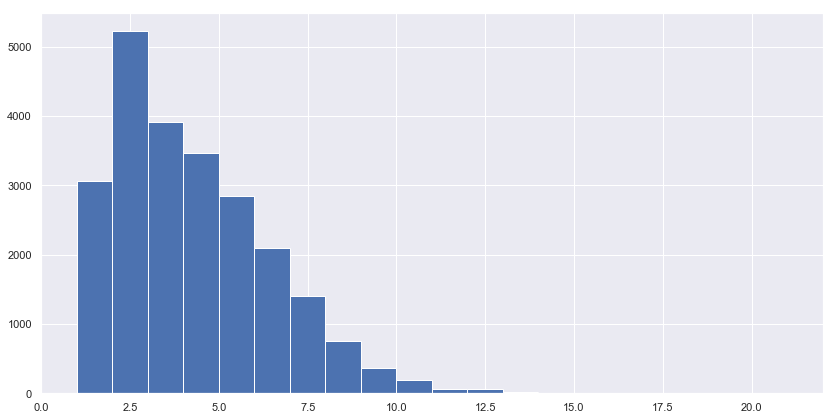

In [108]:
train['household_size'].hist(bins=20, figsize=[14,7])

In [109]:
log_household_size = train.household_size.apply(np.log10)
sqrt_household_size = train.household_size.apply(np.sqrt)
log_household_size_test = test.household_size.apply(np.log10)
sqrt_household_size_test = test.household_size.apply(np.sqrt)

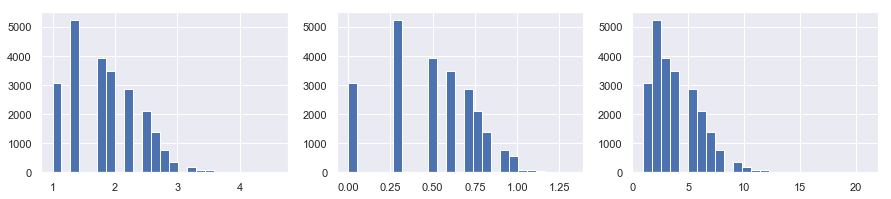

In [110]:
plt.subplot(331)
hist_sqrt_household_size = sqrt_household_size.hist(bins=25, figsize=[15,10]) #sqrt histogram

plt.subplot(332)
hist_log_household_size = log_household_size.hist(bins=25, figsize=[15,10])#log histogram

plt.subplot(333)
hist_household_size = train['household_size'].hist(bins=25, figsize=[15,10])#original distribution

cellphone access

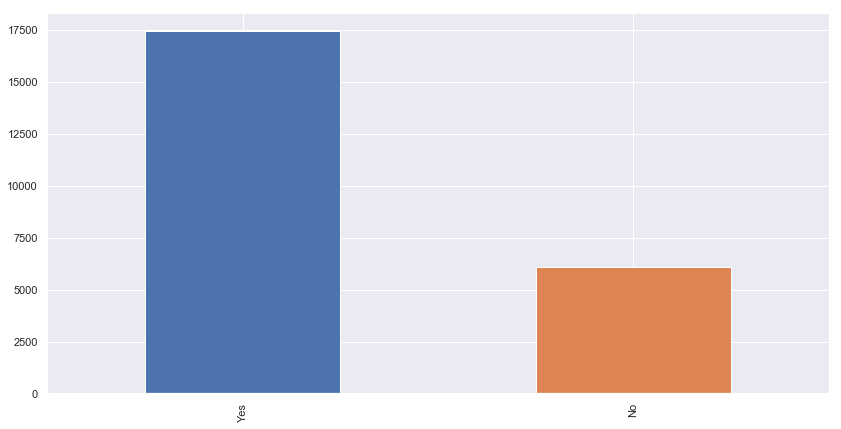

In [111]:
train['cellphone_access'].value_counts().plot(kind='bar', figsize=[14,7])

location type

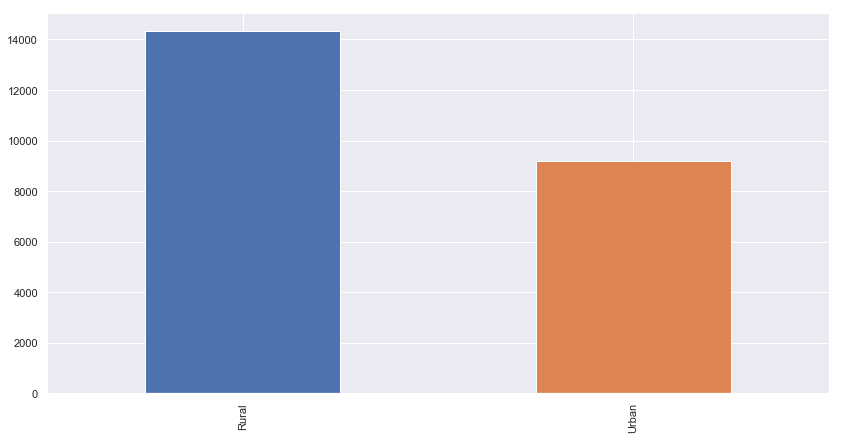

In [112]:
train['location_type'].value_counts().plot(kind ='bar', figsize =[14,7])

People from rural area have been interviewed than people from urban area

job_type

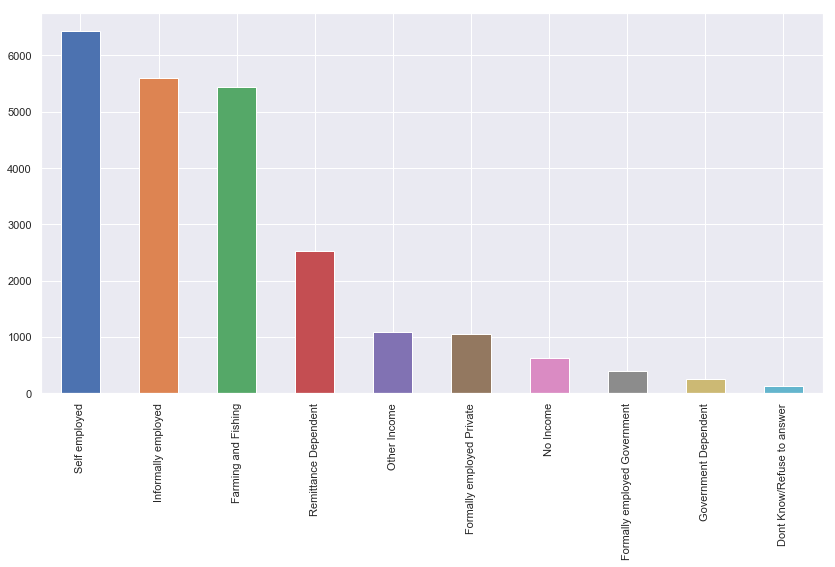

In [113]:
train['job_type'].value_counts().plot(kind='bar', figsize =[14,7])

In [114]:
#lets preview the ratio for the country in the train dataset
Rwanda =len(train[train.country=='Rwanda'])
Tanzania=len(train[train.country=='Tanzania'])
Kenya =len(train[train.country=='Kenya'])
Uganda =len(train[train.country=='Uganda'])
countries =len(train)
print('Rwanda %i%% Tanzania %i%%  Kenya %i%%  Uganda %i%%' %(Rwanda/countries*100,Tanzania/countries*100, Kenya/countries*100, Uganda/countries*100))

Rwanda 37% Tanzania 28%  Kenya 25%  Uganda 8%


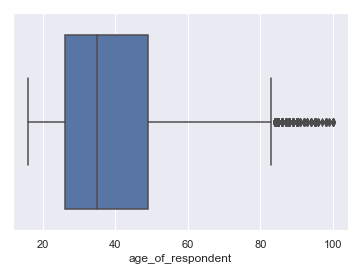

In [115]:
sns.boxplot(x=train['age_of_respondent'])

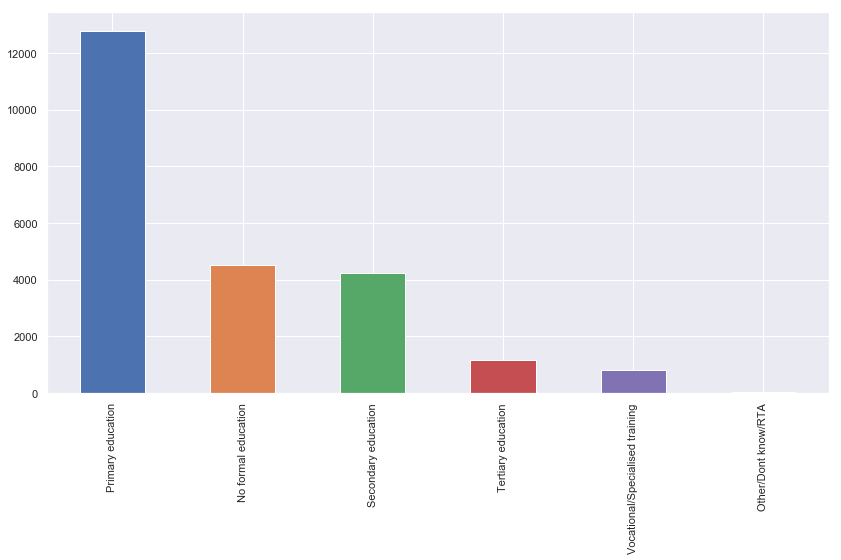

In [116]:
train['education_level'].value_counts().plot(kind ='bar' , figsize=[14,7])

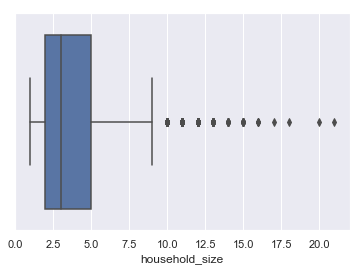

In [117]:
sns.boxplot(x =train['household_size'])

Outliers ranges between 10 - 23. most especially  20_23. we will handle that later with the log function

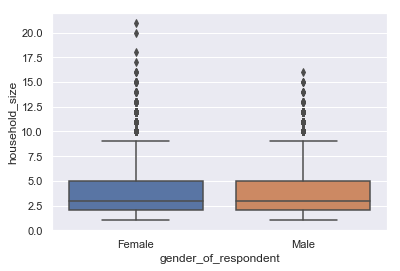

In [118]:
sns.boxplot(x='gender_of_respondent',y ='household_size', data =train)

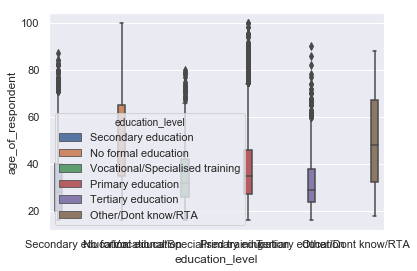

In [119]:
sns.boxplot(x='education_level', y ='age_of_respondent', data=train, hue='education_level')

Multivariate analysis using the target

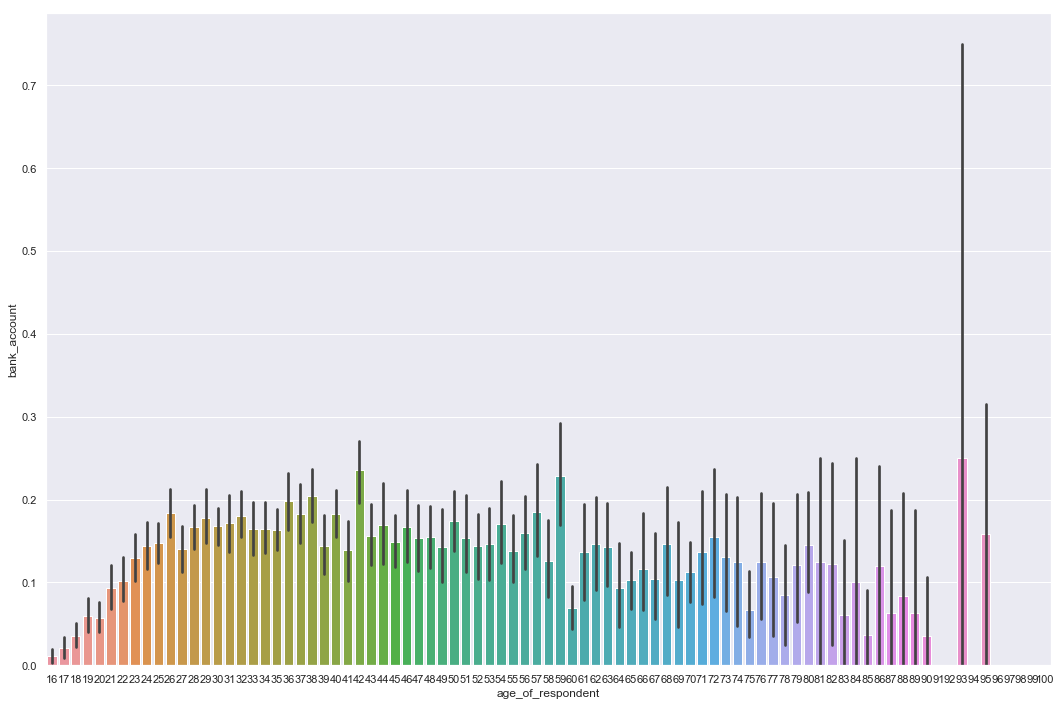

In [120]:
#age_of_resondent against our target
plt.figure(figsize=[18,12])
sns.barplot('age_of_respondent', 'bank_account', data=train)

younger people are more likely and older people are less likely to have a bank_account. We have some outliers beyond the 90 mark for the age variable.

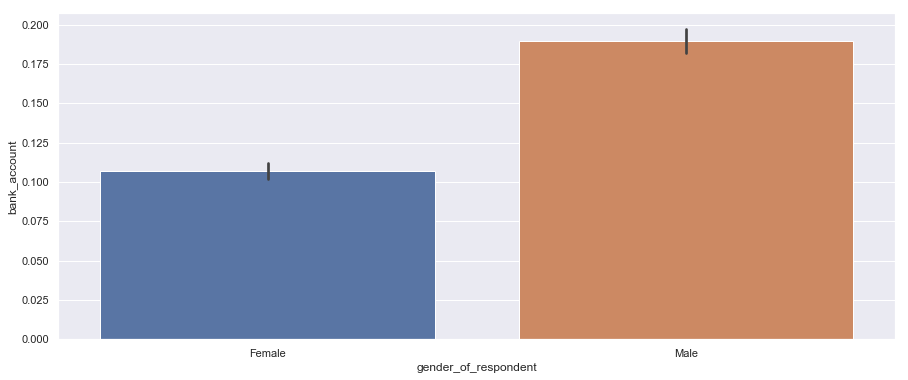

In [121]:
#Gender of respondent against the target
plt.figure(figsize=[15,6])
sns.barplot('gender_of_respondent', 'bank_account', data=train)

Males are more likely to have a bank account according to this plot. Maybe we can combine gender and age, and see if we could notice something judgmental and create a feature that better represents this combination

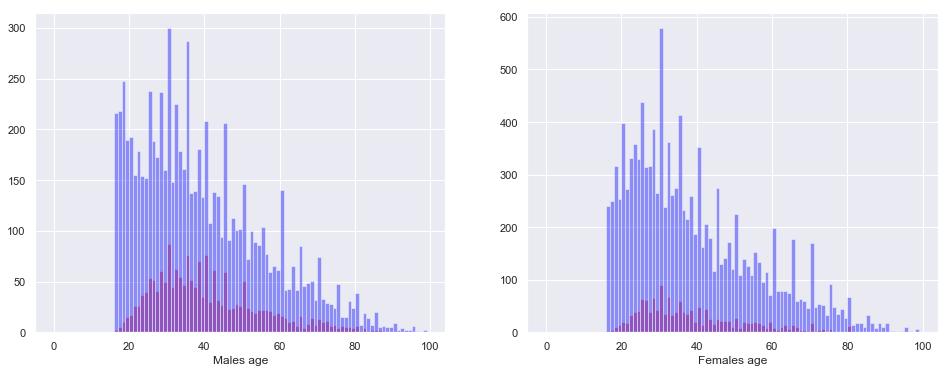

In [122]:
#gender + age
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.gender_of_respondent=='Male')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.gender_of_respondent=='Male')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Males age')
plt.subplot(332)
sns.distplot(train[(train.gender_of_respondent=='Female')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.gender_of_respondent=='Female')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Females age')

For both genders, the peak in the likelihood of having a bank_account happens between 20-40. But the number of males , keeping in mind that in the trainset they are less than females by 4000, who have a bank_account is closer to those who don't compared to females. Meaning, age plays a role for both genders almost the same way, but gender has an important role

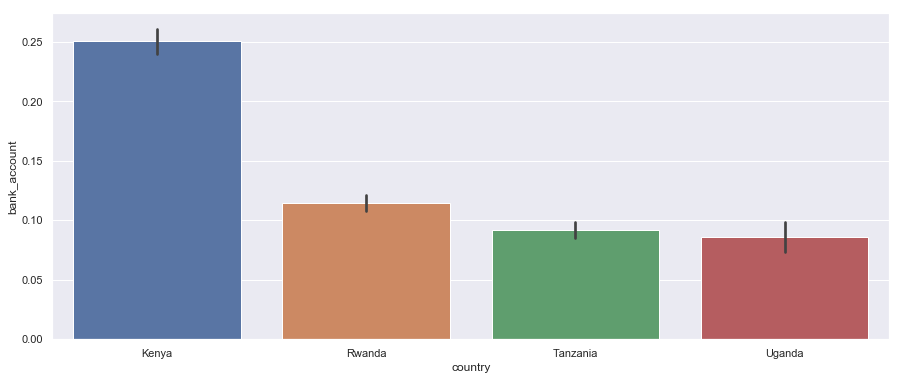

In [123]:
plt.figure(figsize=[15,6])
sns.barplot('country', 'bank_account', data=train)

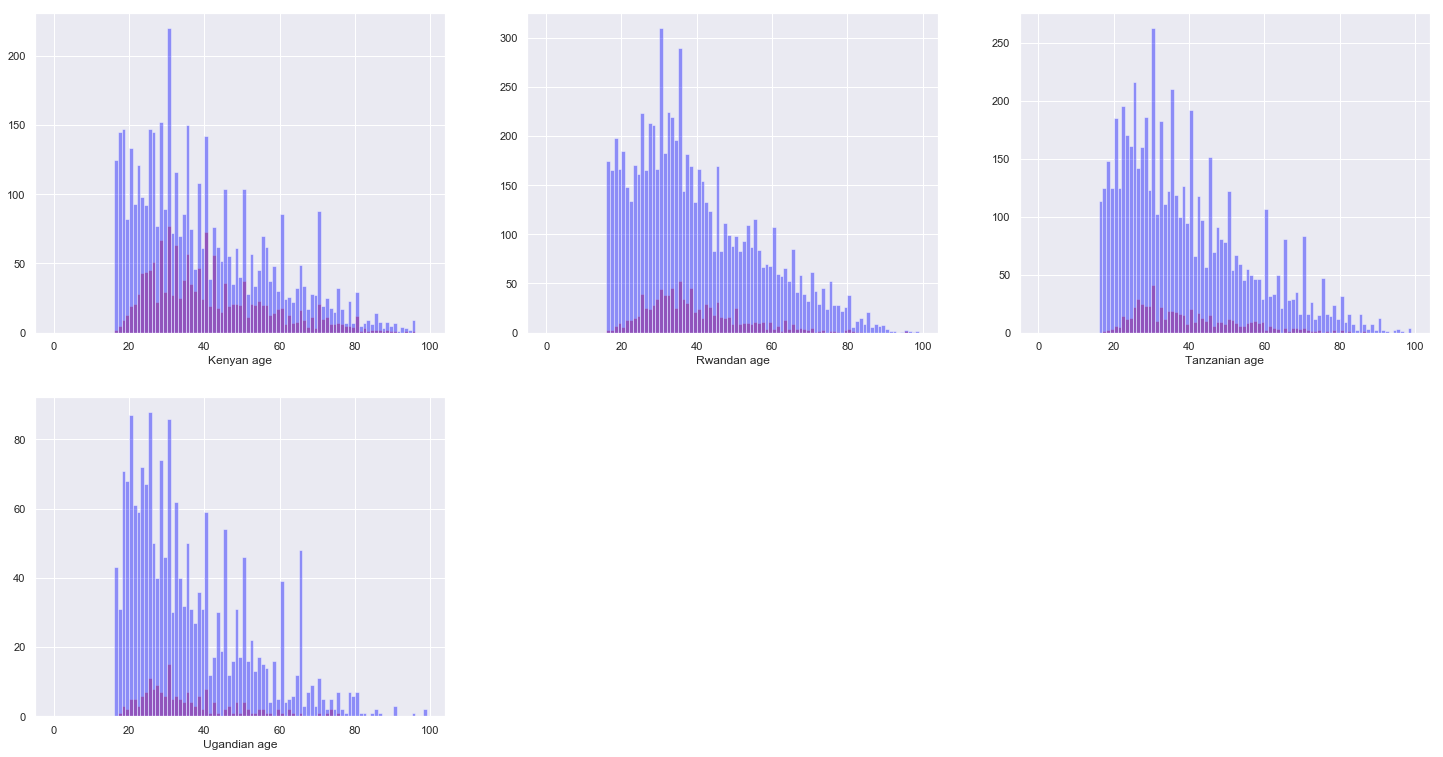

In [124]:
#country+age
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.country=='Kenya')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Kenya')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Kenyan age')
plt.subplot(332)
sns.distplot(train[(train.country=='Rwanda')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Rwanda')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Rwandan age')
plt.subplot(333)
sns.distplot(train[(train.country=='Tanzania')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Tanzania')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Tanzanian age')
plt.subplot(334)
sns.distplot(train[(train.country=='Uganda')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Uganda')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Ugandian age')

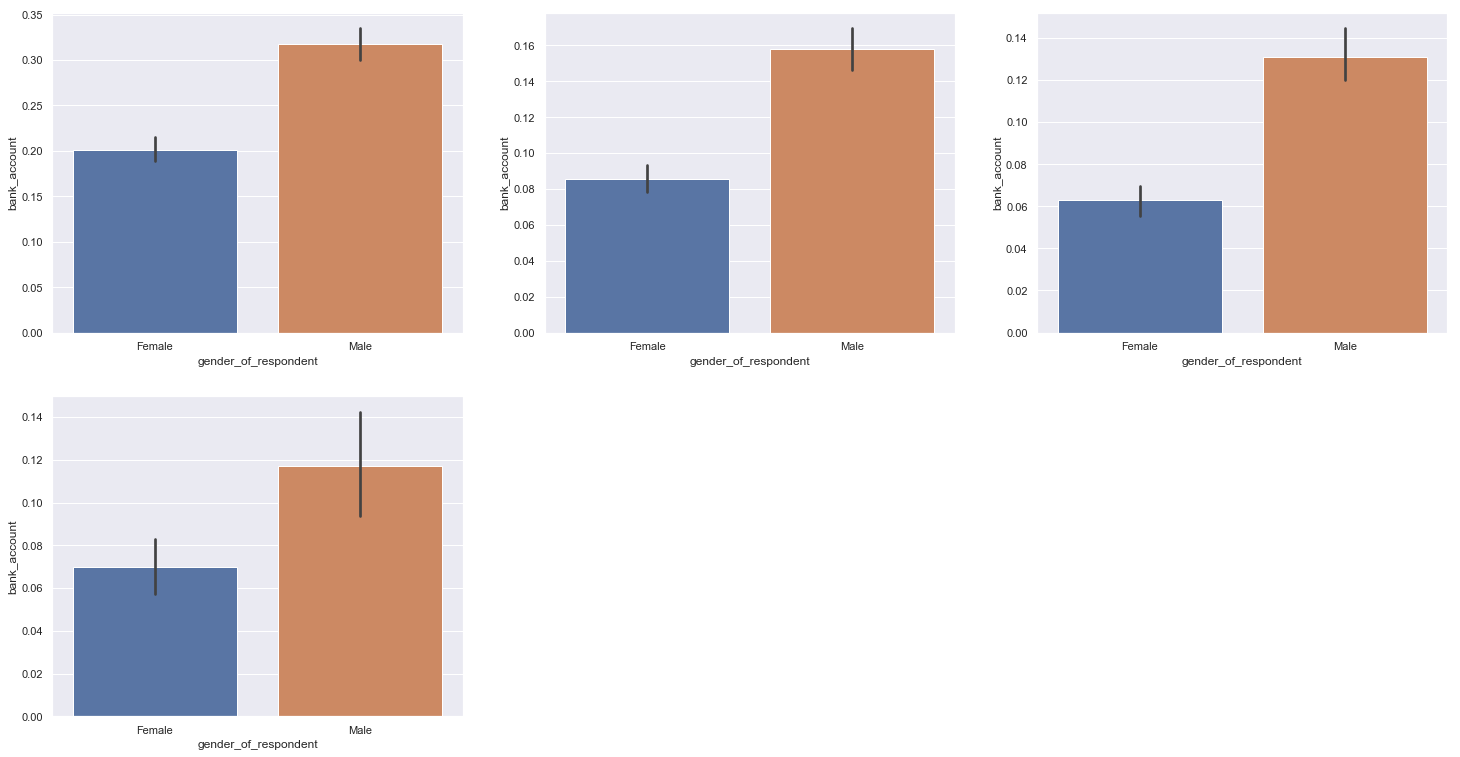

In [125]:
#gender against bank_account
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Kenya')])
plt.subplot(332)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Rwanda')])
plt.subplot(333)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Tanzania')])
plt.subplot(334)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Uganda')])

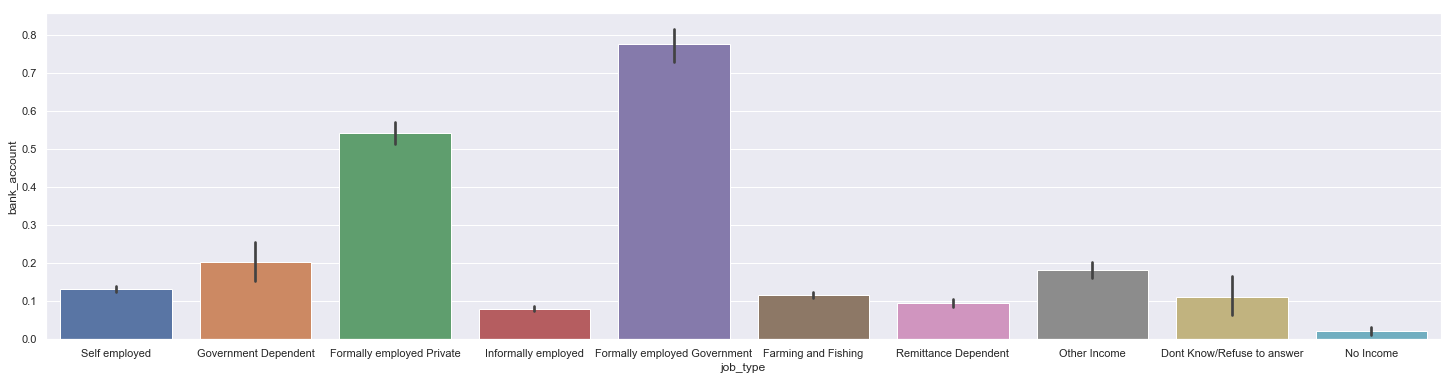

In [126]:
#job_type against bank account
plt.figure(figsize=[25,6])
sns.barplot('job_type', 'bank_account', data=train)

It is crystal clear that those who are formally employed by the government and privately are likely to have a bank_account

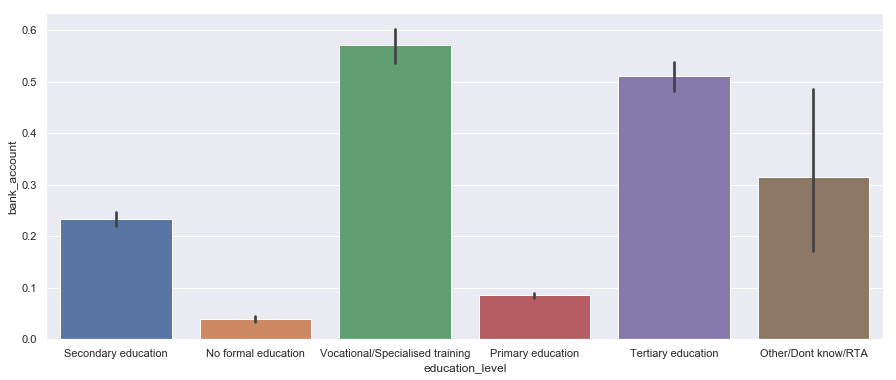

In [127]:
plt.figure(figsize=[15,6])
sns.barplot('education_level', 'bank_account', data=train)

# Those who have attained a tertiary education and vocational training are most likely to have a bank account

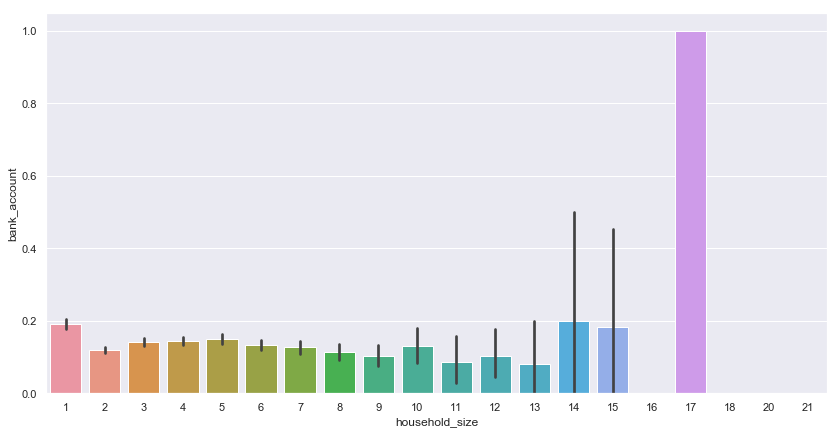

In [128]:
plt.figure(figsize=[14,7])
sns.barplot('household_size', 'bank_account', data=train)

Data wrangling need to be carried out to get something useful out of this variabel as you can see the bigger values has fewer samples and they might also have outliers.

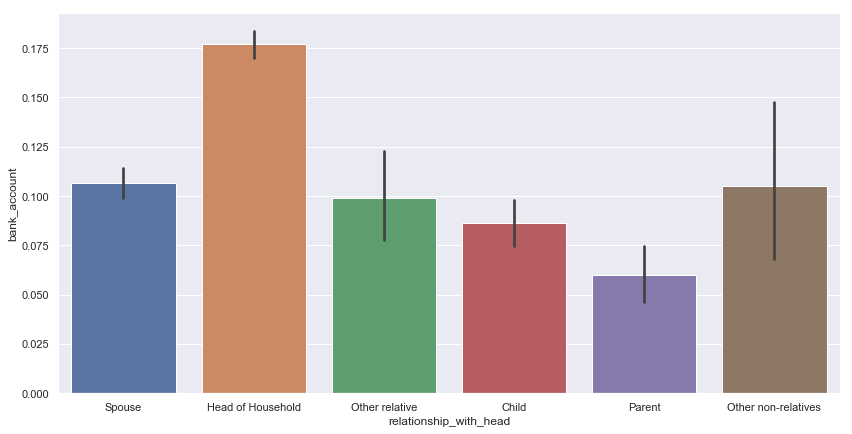

In [129]:
plt.figure(figsize=[14,7])
sns.barplot('relationship_with_head', 'bank_account', data=train)

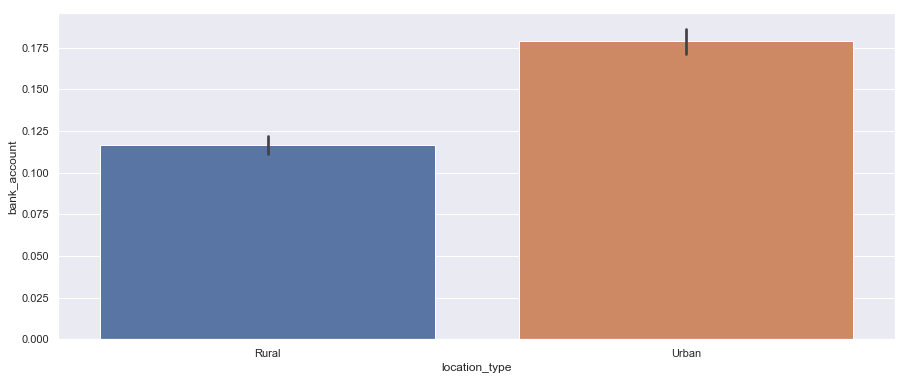

In [130]:
plt.figure(figsize=[15,6])
sns.barplot('location_type', 'bank_account', data=train)

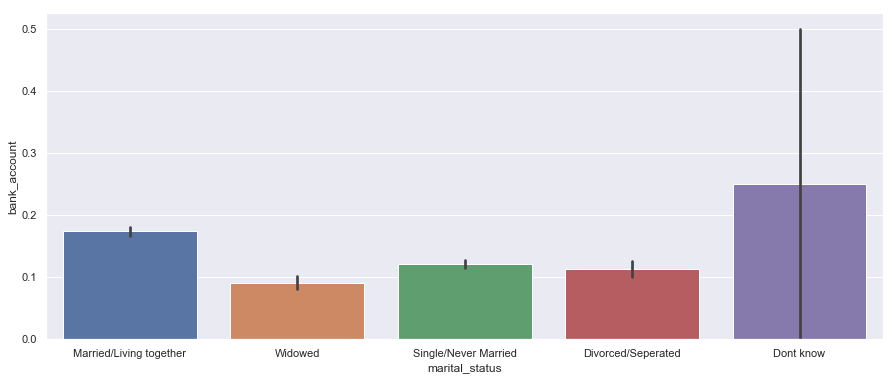

In [131]:
plt.figure(figsize=[15,6])
sns.barplot('marital_status', 'bank_account', data=train)

there are similarity across all categories, the undersampled Dont know with 38 samples might cause a problem.

# interacting between features with respect to bank account 

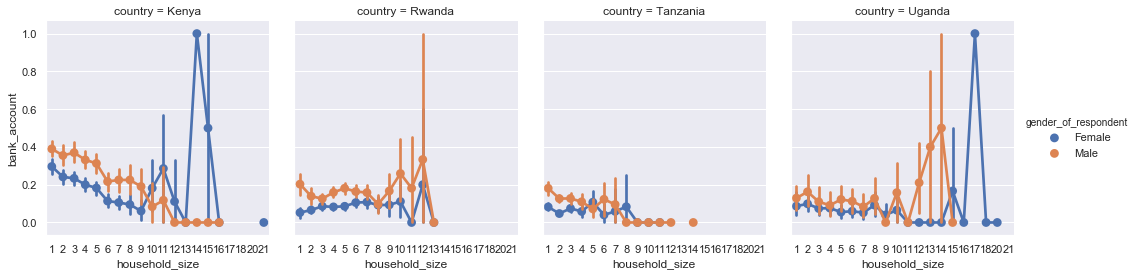

In [132]:
sns.factorplot(x="household_size", y="bank_account", hue="gender_of_respondent", col="country",data=train, aspect=0.9, size=4, ci=95.0)

for Kenyans, we can see that household_size is inversely proportionnal to the target, except for some outliers that mess up the plot at bigger household_size values. For Tanzanians , the decline is clearer with lesser outliers. Uganda and Rwanda also have a small decline but the outliers are at it again.

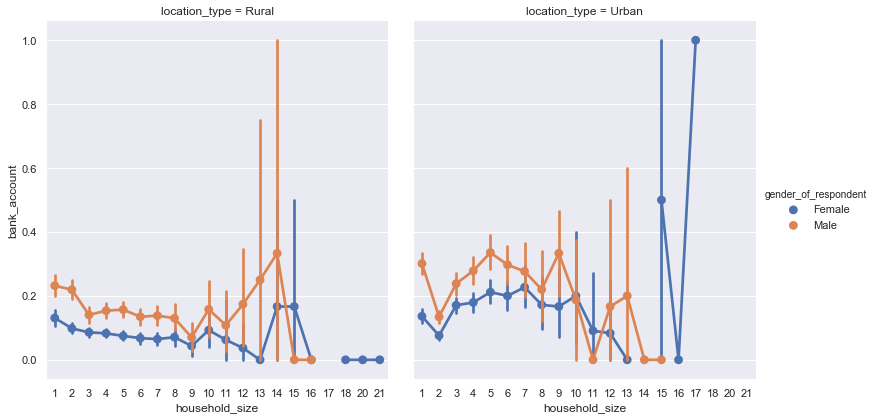

In [133]:
sns.factorplot(x="household_size", y="bank_account", hue="gender_of_respondent", col="location_type",data=train, aspect=0.9, size=6, ci=95.0)

# DATA CREATION

In [134]:
#train['Age Category'] = ['Early_working_age' if 15<age<25 else 'Prime_working_age' if 24<age<55 else 'Mature_working_age' if 55<age<65 else 'Elderly' if 65<age<100 else None \
 #for age in list(train['age_of_respondent'].values)]

#test['Age Category'] = ['Early_working_age' if 15<age<25 else 'Prime_working_age' if 24<age<55 else 'Mature_working_age' if 55<age<65 else 'Elderly' if 65<age<100 else None \
 #for age in list(test['age_of_respondent'].values)]

train['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else 'SilentG' if 73<age<=100 else None \
 for age in list(train['age_of_respondent'].values)]
test['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else 'SilentG' if 73<age<=100 else None \
 for age in list(test['age_of_respondent'].values)]

In [135]:
bins = [0, 1, 10, 25]
labels = [1,2,3]
train['familysize'] = pd.cut(train['household_size'], bins=bins, labels=labels)

In [136]:
bins = [0, 1, 10, 25]
labels = [1,2,3]
test['familysize'] = pd.cut(test['household_size'], bins=bins, labels=labels)

In [137]:
test.familysize.value_counts()

2    8695
1    1320
3      71
Name: familysize, dtype: int64

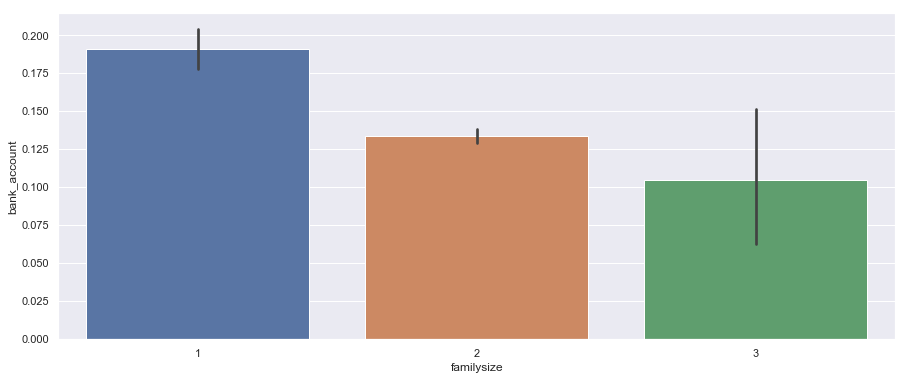

In [138]:
plt.figure(figsize=[15,6])
sns.barplot('familysize', 'bank_account', data=train)

This new binned variable based on household_size is clearly indicating that the bigger the house the person lives in, the less likely that person would have a bank_account.

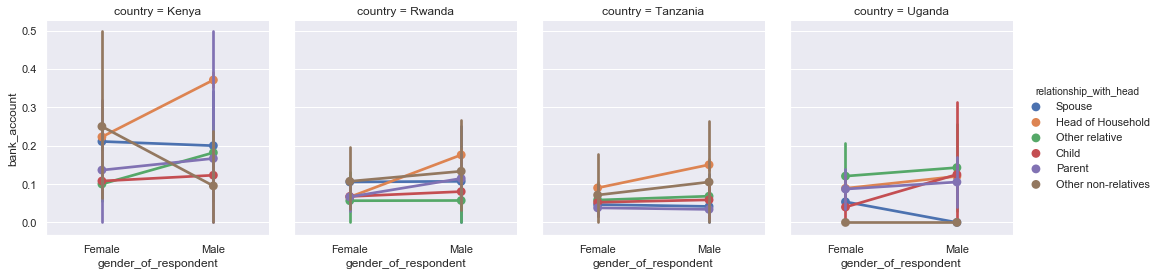

In [139]:
sns.factorplot(x="gender_of_respondent", y="bank_account", hue="relationship_with_head", col="country",data=train, aspect=0.9, size=4, ci=95.0)

All countries have almost the same tendencies between male/female across all relationship_with_head categories with Kenya having a big difference between male head of house and female head of house

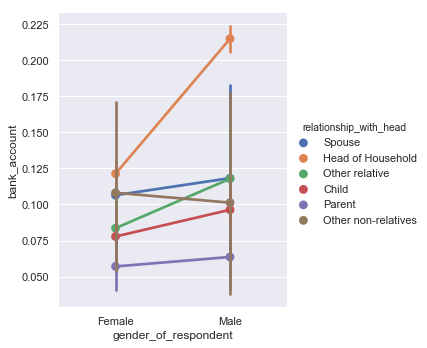

In [140]:
sns.factorplot(x="gender_of_respondent", y="bank_account", hue="relationship_with_head",data=train, aspect=0.9, size=5, ci=95.0)

This shows that only head of household is different between genders. definetely new feature can be created distinguish HOH

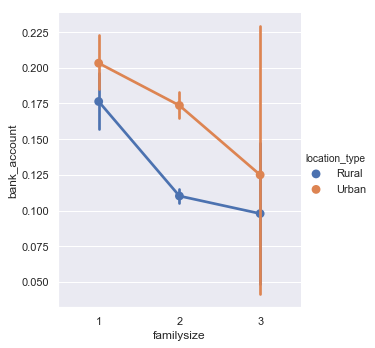

In [141]:
sns.factorplot(x="familysize", y="bank_account", hue="location_type",data=train, aspect=0.9, size=5, ci=95.0)

The bigger the house the lower the chance you'd have a bank_account , and that pattern is followed by both urban locations and rural ones

In [142]:
# binning the age!
bins = [10, 20, 30, 40,60,80,100]
labels = [1,2,3,4,5,6]
train['binnedage'] = pd.cut(train['age_of_respondent'], bins=bins, labels=labels)

In [143]:
# binning the age!
bins = [10, 20, 30, 40,60,80,100]
labels = [1,2,3,4,5,6]
test['binnedage'] = pd.cut(test['age_of_respondent'], bins=bins, labels=labels)

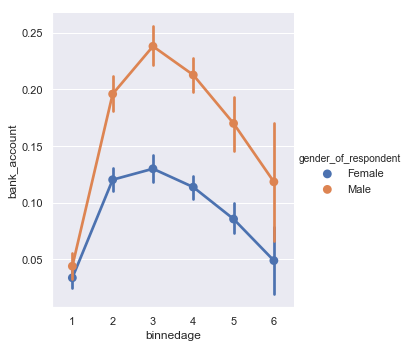

In [144]:
sns.factorplot(x="binnedage", y="bank_account", hue="gender_of_respondent",data=train, aspect=0.9, size=5, ci=95.0)

No need to create a new feature based on feature interaction age-gender, Both genders follow the same pattern, it gets the highest between 20-30, and then starts slowly decreasing.

In [145]:
def education_bin(x):
    if x =="Other/Dont know/RTA":
        return 0
    elif x =="No formal education":
        return 1
    elif x =="Primary education":
        return 2
    elif x =="Secondary education":
        return 3
    elif x =="Vocational/Specialised training":
        return 4
    else:
        return 5
train['education_binning'] =train['education_level'].apply(education_bin)
newbin = train[['education_level','education_binning' ]]

In [146]:
def education_bint(x):
    if x =="Other/Dont know/RTA":
        return 0
    elif x =="No formal education":
        return 1
    elif x =="Primary education":
        return 2
    elif x =="Secondary education":
        return 3
    elif x =="Vocational/Specialised training":
        return 4
    else:
        return 5
test['education_binning'] =test['education_level'].apply(education_bint)
newbint = test[['education_level','education_binning' ]]

In [147]:

train.job_type.replace({"Farming and Fishing":"Self employed"}, inplace=True)
train.job_type.replace({"Farming and Fishing":"Self employed"}, inplace=True)

test.job_type.replace({"Farming and Fishing":"Self employed"}, inplace=True)
test.job_type.replace({"Farming and Fishing":"Self employed"}, inplace=True)

In [148]:
test['education_level'].unique()

array(['Secondary education', 'Vocational/Specialised training',
       'No formal education', 'Primary education', 'Other/Dont know/RTA',
       'Tertiary education'], dtype=object)

Feature creation

In [149]:
def status(x):
    if x == 'Widowed':
        return 0
    elif x == 'Divorced/Seperated':
        return 0
    elif x == 'Single/Never Married':
        return 0
    elif x == 'Single/Never Married':
        return 0
    else:
        return 1
train['single_or_not'] =train['marital_status'].apply(status)

In [150]:
newz =train[['marital_status', 'single_or_not']]

In [151]:
def statust(x):
    if x == 'Widowed':
        return 0
    elif x == 'Divorced/Seperated':
        return 0
    elif x == 'Single/Never Married':
        return 0
    else:
        return 1
test['single_or_not'] =test['marital_status'].apply(statust)

In [152]:
newzt =test[['marital_status', 'single_or_not']]

In [153]:
def household(x):
    if x == 3:
        return 1
    elif x == 5:
        return 1
    elif x == 8:
        return 1
    elif x == 7:
        return 1
    elif x == 6:
        return 1
    elif x == 4:
        return 1
    elif x == 10:
        return 1
    elif x == 2:
        return 1
    elif x == 11:
        return 1
    elif x == 9:
        return 1
    elif x == 12:
        return 1
    elif x == 16:
        return 1
    elif x == 15:
        return 1
    elif x == 13:
        return 1
    elif x == 14:
        return 1
    elif x == 21:
        return 1
    else:
        return 0
train['family_or_not'] =train['household_size'].apply(household)

In [154]:
def householdt(x):
    if x == 3:
        return 1
    elif x == 5:
        return 1
    elif x == 8:
        return 1
    elif x == 7:
        return 1
    elif x == 6:
        return 1
    elif x == 4:
        return 1
    elif x == 10:
        return 1
    elif x == 2:
        return 1
    elif x == 11:
        return 1
    elif x == 9:
        return 1
    elif x == 12:
        return 1
    elif x == 16:
        return 1
    elif x == 15:
        return 1
    elif x == 13:
        return 1
    elif x == 14:
        return 1
    elif x == 21:
        return 1
    else:
        return 0
test['family_or_not'] =test['household_size'].apply(householdt)

In [155]:
newd =train[['household_size','family_or_not']]

In [156]:
newdd =test[['household_size','family_or_not']]

In [157]:
def educatet(x):
    if x == 'No formal education':
        return 0
    else:
        return 1
test['educated_or_not'] = test['education_level'].apply(educatet)

In [158]:
def educate(x):
    if x == 'No formal education':
        return 0
    else:
        return 1
train['educated_or_not'] = train['education_level'].apply(educate)

In [159]:
newg =test[['education_level', 'educated_or_not']]

In [160]:
newgg =train[['education_level', 'educated_or_not']]

In [161]:
train.describe()

,year,bank_account,household_size,age_of_respondent,education_binning,single_or_not,family_or_not,educated_or_not
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,2016.975939,0.140792,3.797483,38.805220,2.200434,0.457278,0.869920,0.808068
std,0.847371,0.347815,2.227613,16.520569,0.957321,0.498182,0.336398,0.393828
min,2016.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,2.000000,26.000000,2.000000,0.000000,1.000000,1.000000
50%,2017.000000,0.000000,3.000000,35.000000,2.000000,0.000000,1.000000,1.000000
75%,2018.000000,0.000000,5.000000,49.000000,3.000000,1.000000,1.000000,1.000000
max,2018.000000,1.000000,21.000000,100.000000,5.000000,1.000000,1.000000,1.000000


In [162]:
col =train['education_level']
col.value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [163]:
edu = train[train['education_level'] == 'Primary education']
edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 3 to 23521
Data columns (total 20 columns):
country                   12791 non-null object
year                      12791 non-null int64
uniqueid                  12791 non-null object
bank_account              12791 non-null int64
location_type             12791 non-null object
cellphone_access          12791 non-null object
household_size            12791 non-null int64
age_of_respondent         12791 non-null int64
gender_of_respondent      12791 non-null object
relationship_with_head    12791 non-null object
marital_status            12791 non-null object
education_level           12791 non-null object
job_type                  12791 non-null object
Age Category              12791 non-null object
familysize                12791 non-null category
binnedage                 12791 non-null category
education_binning         12791 non-null int64
single_or_not             12791 non-null int64
family_or_not             127

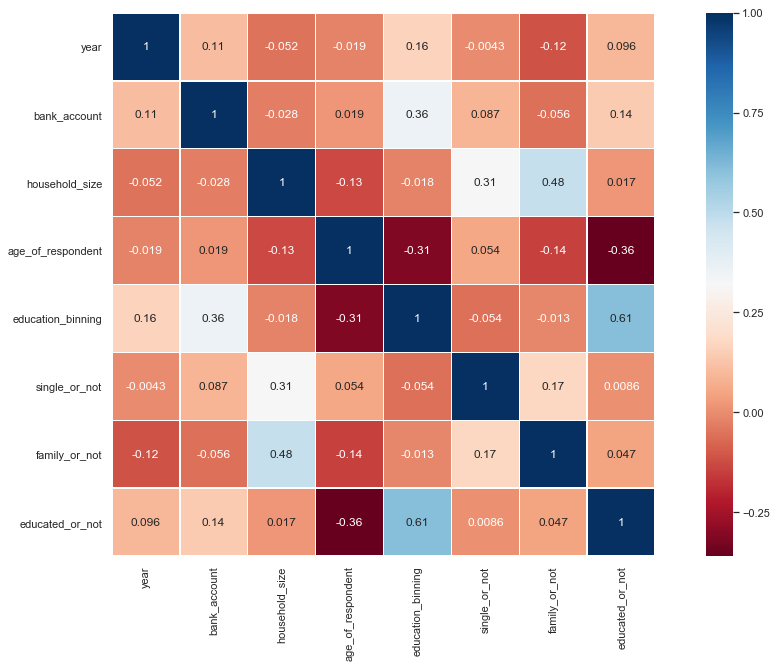

In [164]:
#plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, square=True, annot=True, linewidth=0.8, cmap='RdBu')

In [165]:
train['log_age_of_respondent'] =  np.log(train['age_of_respondent'])
test['log_age_of_respondent'] =  np.log(test['age_of_respondent'])
train['log_household_size'] =  np.log(train['household_size'])
test['log_household_size'] =  np.log(test['household_size'])

In [166]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type,Age Category,familysize,binnedage,education_binning,single_or_not,family_or_not,educated_or_not,log_age_of_respondent,log_household_size
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,...,Self employed,iGen,2,2,3,1,1,1,3.178054,1.098612
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,...,Government Dependent,BabyBoomers,2,5,1,0,1,0,4.248495,1.609438
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,...,Self employed,Millenials,2,2,4,0,1,1,3.258097,1.609438
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,...,Formally employed Private,Millenials,2,3,2,1,1,1,3.526361,1.609438
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,...,Informally employed,Millenials,2,2,2,0,1,1,3.258097,2.079442


In [167]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
Age Category              0
familysize                0
binnedage                 0
education_binning         0
single_or_not             0
family_or_not             0
educated_or_not           0
log_age_of_respondent     0
log_household_size        0
dtype: int64

# ALGORITHMS

In [168]:
test.shape

(10086, 21)

In [169]:
x = train.drop('bank_account', axis =1)
y = train.bank_account

In [170]:
cate_features_index = np.where(x.dtypes != float)[0];cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

In [173]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
import xgboost as xgb
from catboost import Pool, CatBoostClassifier, cv

In [174]:
model = CatBoostClassifier(iterations=1500, depth=8, learning_rate=0.03,eval_metric='Accuracy',use_best_model=True, random_seed=42)
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.8789697	test: 0.8843865	best: 0.8843865 (0)	total: 858ms	remaining: 21m 25s
1:	learn: 0.8830208	test: 0.8920374	best: 0.8920374 (1)	total: 1.93s	remaining: 24m 7s
2:	learn: 0.8834209	test: 0.8928875	best: 0.8928875 (2)	total: 2.89s	remaining: 24m
3:	learn: 0.8836209	test: 0.8931709	best: 0.8931709 (3)	total: 3.85s	remaining: 23m 59s
4:	learn: 0.8833208	test: 0.8928875	best: 0.8931709 (3)	total: 4.65s	remaining: 23m 10s
5:	learn: 0.8834709	test: 0.8926041	best: 0.8931709 (3)	total: 5.65s	remaining: 23m 26s
6:	learn: 0.8838210	test: 0.8948711	best: 0.8948711 (6)	total: 6.08s	remaining: 21m 37s
7:	learn: 0.8841710	test: 0.8951544	best: 0.8951544 (7)	total: 7.12s	remaining: 22m 8s
8:	learn: 0.8837709	test: 0.8951544	best: 0.8951544 (7)	total: 8.13s	remaining: 22m 27s
9:	learn: 0.8835209	test: 0.8957212	best: 0.8957212 (9)	total: 8.67s	remaining: 21m 31s
10:	learn: 0.8837209	test: 0.8948711	best: 0.8957212 (9)	total: 9.69s	remaining: 21m 52s
11:	learn: 0.8835209	test: 0.8943043	

92:	learn: 0.8882221	test: 0.8962879	best: 0.8968546 (63)	total: 1m 15s	remaining: 19m 9s
93:	learn: 0.8884721	test: 0.8968546	best: 0.8968546 (63)	total: 1m 16s	remaining: 19m 1s
94:	learn: 0.8885221	test: 0.8965713	best: 0.8968546 (63)	total: 1m 16s	remaining: 18m 56s
95:	learn: 0.8884721	test: 0.8965713	best: 0.8968546 (63)	total: 1m 17s	remaining: 18m 46s
96:	learn: 0.8884221	test: 0.8968546	best: 0.8968546 (63)	total: 1m 17s	remaining: 18m 41s
97:	learn: 0.8884721	test: 0.8968546	best: 0.8968546 (63)	total: 1m 17s	remaining: 18m 33s
98:	learn: 0.8885221	test: 0.8965713	best: 0.8968546 (63)	total: 1m 18s	remaining: 18m 26s
99:	learn: 0.8884721	test: 0.8965713	best: 0.8968546 (63)	total: 1m 18s	remaining: 18m 21s
100:	learn: 0.8885721	test: 0.8962879	best: 0.8968546 (63)	total: 1m 19s	remaining: 18m 22s
101:	learn: 0.8887222	test: 0.8962879	best: 0.8968546 (63)	total: 1m 20s	remaining: 18m 18s
102:	learn: 0.8890723	test: 0.8962879	best: 0.8968546 (63)	total: 1m 21s	remaining: 18m 19

182:	learn: 0.8903726	test: 0.8977047	best: 0.8979881 (165)	total: 2m 12s	remaining: 15m 51s
183:	learn: 0.8903726	test: 0.8977047	best: 0.8979881 (165)	total: 2m 13s	remaining: 15m 51s
184:	learn: 0.8904226	test: 0.8977047	best: 0.8979881 (165)	total: 2m 13s	remaining: 15m 47s
185:	learn: 0.8904226	test: 0.8977047	best: 0.8979881 (165)	total: 2m 14s	remaining: 15m 48s
186:	learn: 0.8904726	test: 0.8977047	best: 0.8979881 (165)	total: 2m 15s	remaining: 15m 49s
187:	learn: 0.8904226	test: 0.8977047	best: 0.8979881 (165)	total: 2m 15s	remaining: 15m 46s
188:	learn: 0.8903726	test: 0.8977047	best: 0.8979881 (165)	total: 2m 16s	remaining: 15m 44s
189:	learn: 0.8904226	test: 0.8977047	best: 0.8979881 (165)	total: 2m 16s	remaining: 15m 42s
190:	learn: 0.8903726	test: 0.8977047	best: 0.8979881 (165)	total: 2m 17s	remaining: 15m 40s
191:	learn: 0.8905226	test: 0.8977047	best: 0.8979881 (165)	total: 2m 18s	remaining: 15m 42s
192:	learn: 0.8905726	test: 0.8977047	best: 0.8979881 (165)	total: 2m 

271:	learn: 0.8912228	test: 0.8968546	best: 0.8979881 (165)	total: 2m 56s	remaining: 13m 18s
272:	learn: 0.8912728	test: 0.8968546	best: 0.8979881 (165)	total: 2m 57s	remaining: 13m 19s
273:	learn: 0.8912728	test: 0.8968546	best: 0.8979881 (165)	total: 2m 58s	remaining: 13m 18s
274:	learn: 0.8912228	test: 0.8968546	best: 0.8979881 (165)	total: 2m 58s	remaining: 13m 16s
275:	learn: 0.8912228	test: 0.8968546	best: 0.8979881 (165)	total: 2m 59s	remaining: 13m 14s
276:	learn: 0.8912728	test: 0.8968546	best: 0.8979881 (165)	total: 2m 59s	remaining: 13m 12s
277:	learn: 0.8912728	test: 0.8968546	best: 0.8979881 (165)	total: 2m 59s	remaining: 13m 9s
278:	learn: 0.8912728	test: 0.8968546	best: 0.8979881 (165)	total: 2m 59s	remaining: 13m 6s
279:	learn: 0.8911228	test: 0.8968546	best: 0.8979881 (165)	total: 3m	remaining: 13m 6s
280:	learn: 0.8911728	test: 0.8965713	best: 0.8979881 (165)	total: 3m 1s	remaining: 13m 6s
281:	learn: 0.8911728	test: 0.8965713	best: 0.8979881 (165)	total: 3m 1s	remain

360:	learn: 0.8916729	test: 0.8960045	best: 0.8979881 (165)	total: 3m 40s	remaining: 11m 37s
361:	learn: 0.8916729	test: 0.8960045	best: 0.8979881 (165)	total: 3m 41s	remaining: 11m 37s
362:	learn: 0.8916729	test: 0.8960045	best: 0.8979881 (165)	total: 3m 42s	remaining: 11m 37s
363:	learn: 0.8918730	test: 0.8960045	best: 0.8979881 (165)	total: 3m 43s	remaining: 11m 37s
364:	learn: 0.8918230	test: 0.8960045	best: 0.8979881 (165)	total: 3m 44s	remaining: 11m 37s
365:	learn: 0.8917729	test: 0.8960045	best: 0.8979881 (165)	total: 3m 44s	remaining: 11m 36s
366:	learn: 0.8918230	test: 0.8960045	best: 0.8979881 (165)	total: 3m 45s	remaining: 11m 36s
367:	learn: 0.8918230	test: 0.8957212	best: 0.8979881 (165)	total: 3m 46s	remaining: 11m 36s
368:	learn: 0.8918730	test: 0.8957212	best: 0.8979881 (165)	total: 3m 47s	remaining: 11m 37s
369:	learn: 0.8918730	test: 0.8957212	best: 0.8979881 (165)	total: 3m 48s	remaining: 11m 37s
370:	learn: 0.8919230	test: 0.8957212	best: 0.8979881 (165)	total: 3m 

449:	learn: 0.8929732	test: 0.8957212	best: 0.8979881 (165)	total: 4m 59s	remaining: 11m 39s
450:	learn: 0.8930233	test: 0.8957212	best: 0.8979881 (165)	total: 5m	remaining: 11m 39s
451:	learn: 0.8929232	test: 0.8962879	best: 0.8979881 (165)	total: 5m 1s	remaining: 11m 39s
452:	learn: 0.8929232	test: 0.8962879	best: 0.8979881 (165)	total: 5m 2s	remaining: 11m 39s
453:	learn: 0.8929732	test: 0.8962879	best: 0.8979881 (165)	total: 5m 3s	remaining: 11m 39s
454:	learn: 0.8929732	test: 0.8962879	best: 0.8979881 (165)	total: 5m 4s	remaining: 11m 38s
455:	learn: 0.8929732	test: 0.8962879	best: 0.8979881 (165)	total: 5m 5s	remaining: 11m 38s
456:	learn: 0.8928732	test: 0.8962879	best: 0.8979881 (165)	total: 5m 6s	remaining: 11m 38s
457:	learn: 0.8928232	test: 0.8962879	best: 0.8979881 (165)	total: 5m 6s	remaining: 11m 38s
458:	learn: 0.8930233	test: 0.8962879	best: 0.8979881 (165)	total: 5m 7s	remaining: 11m 38s
459:	learn: 0.8931233	test: 0.8960045	best: 0.8979881 (165)	total: 5m 8s	remaining

538:	learn: 0.8947737	test: 0.8957212	best: 0.8979881 (165)	total: 6m 23s	remaining: 11m 24s
539:	learn: 0.8947737	test: 0.8957212	best: 0.8979881 (165)	total: 6m 24s	remaining: 11m 23s
540:	learn: 0.8948237	test: 0.8957212	best: 0.8979881 (165)	total: 6m 25s	remaining: 11m 23s
541:	learn: 0.8948237	test: 0.8960045	best: 0.8979881 (165)	total: 6m 26s	remaining: 11m 22s
542:	learn: 0.8948237	test: 0.8960045	best: 0.8979881 (165)	total: 6m 27s	remaining: 11m 22s
543:	learn: 0.8948237	test: 0.8960045	best: 0.8979881 (165)	total: 6m 28s	remaining: 11m 22s
544:	learn: 0.8948237	test: 0.8960045	best: 0.8979881 (165)	total: 6m 29s	remaining: 11m 22s
545:	learn: 0.8947737	test: 0.8960045	best: 0.8979881 (165)	total: 6m 30s	remaining: 11m 21s
546:	learn: 0.8947737	test: 0.8960045	best: 0.8979881 (165)	total: 6m 31s	remaining: 11m 21s
547:	learn: 0.8947737	test: 0.8960045	best: 0.8979881 (165)	total: 6m 32s	remaining: 11m 21s
548:	learn: 0.8948737	test: 0.8960045	best: 0.8979881 (165)	total: 6m 

627:	learn: 0.8963741	test: 0.8951544	best: 0.8979881 (165)	total: 7m 42s	remaining: 10m 42s
628:	learn: 0.8964741	test: 0.8951544	best: 0.8979881 (165)	total: 7m 43s	remaining: 10m 42s
629:	learn: 0.8965741	test: 0.8951544	best: 0.8979881 (165)	total: 7m 44s	remaining: 10m 41s
630:	learn: 0.8966242	test: 0.8951544	best: 0.8979881 (165)	total: 7m 45s	remaining: 10m 40s
631:	learn: 0.8965241	test: 0.8951544	best: 0.8979881 (165)	total: 7m 46s	remaining: 10m 40s
632:	learn: 0.8966742	test: 0.8951544	best: 0.8979881 (165)	total: 7m 47s	remaining: 10m 39s
633:	learn: 0.8968242	test: 0.8951544	best: 0.8979881 (165)	total: 7m 48s	remaining: 10m 39s
634:	learn: 0.8968742	test: 0.8948711	best: 0.8979881 (165)	total: 7m 49s	remaining: 10m 39s
635:	learn: 0.8968742	test: 0.8948711	best: 0.8979881 (165)	total: 7m 50s	remaining: 10m 38s
636:	learn: 0.8970243	test: 0.8948711	best: 0.8979881 (165)	total: 7m 50s	remaining: 10m 38s
637:	learn: 0.8970743	test: 0.8951544	best: 0.8979881 (165)	total: 7m 

716:	learn: 0.8987247	test: 0.8954378	best: 0.8979881 (165)	total: 9m 2s	remaining: 9m 52s
717:	learn: 0.8987747	test: 0.8954378	best: 0.8979881 (165)	total: 9m 3s	remaining: 9m 51s
718:	learn: 0.8988247	test: 0.8954378	best: 0.8979881 (165)	total: 9m 4s	remaining: 9m 51s
719:	learn: 0.8987247	test: 0.8957212	best: 0.8979881 (165)	total: 9m 4s	remaining: 9m 50s
720:	learn: 0.8987247	test: 0.8957212	best: 0.8979881 (165)	total: 9m 5s	remaining: 9m 49s
721:	learn: 0.8986247	test: 0.8957212	best: 0.8979881 (165)	total: 9m 6s	remaining: 9m 49s
722:	learn: 0.8985246	test: 0.8957212	best: 0.8979881 (165)	total: 9m 7s	remaining: 9m 48s
723:	learn: 0.8986247	test: 0.8960045	best: 0.8979881 (165)	total: 9m 8s	remaining: 9m 47s
724:	learn: 0.8986247	test: 0.8960045	best: 0.8979881 (165)	total: 9m 9s	remaining: 9m 47s
725:	learn: 0.8985746	test: 0.8960045	best: 0.8979881 (165)	total: 9m 10s	remaining: 9m 46s
726:	learn: 0.8985746	test: 0.8960045	best: 0.8979881 (165)	total: 9m 11s	remaining: 9m 4

806:	learn: 0.9002751	test: 0.8960045	best: 0.8979881 (165)	total: 10m 23s	remaining: 8m 55s
807:	learn: 0.9002751	test: 0.8960045	best: 0.8979881 (165)	total: 10m 24s	remaining: 8m 54s
808:	learn: 0.9003751	test: 0.8960045	best: 0.8979881 (165)	total: 10m 25s	remaining: 8m 53s
809:	learn: 0.9004751	test: 0.8960045	best: 0.8979881 (165)	total: 10m 25s	remaining: 8m 53s
810:	learn: 0.9005251	test: 0.8960045	best: 0.8979881 (165)	total: 10m 27s	remaining: 8m 52s
811:	learn: 0.9005251	test: 0.8960045	best: 0.8979881 (165)	total: 10m 28s	remaining: 8m 52s
812:	learn: 0.9005251	test: 0.8960045	best: 0.8979881 (165)	total: 10m 29s	remaining: 8m 51s
813:	learn: 0.9004751	test: 0.8960045	best: 0.8979881 (165)	total: 10m 30s	remaining: 8m 51s
814:	learn: 0.9004251	test: 0.8960045	best: 0.8979881 (165)	total: 10m 31s	remaining: 8m 50s
815:	learn: 0.9004751	test: 0.8960045	best: 0.8979881 (165)	total: 10m 32s	remaining: 8m 49s
816:	learn: 0.9004751	test: 0.8960045	best: 0.8979881 (165)	total: 10m

895:	learn: 0.9011253	test: 0.8960045	best: 0.8979881 (165)	total: 11m 44s	remaining: 7m 55s
896:	learn: 0.9011253	test: 0.8960045	best: 0.8979881 (165)	total: 11m 45s	remaining: 7m 54s
897:	learn: 0.9011753	test: 0.8960045	best: 0.8979881 (165)	total: 11m 46s	remaining: 7m 53s
898:	learn: 0.9011753	test: 0.8960045	best: 0.8979881 (165)	total: 11m 47s	remaining: 7m 53s
899:	learn: 0.9011253	test: 0.8960045	best: 0.8979881 (165)	total: 11m 48s	remaining: 7m 52s
900:	learn: 0.9011753	test: 0.8960045	best: 0.8979881 (165)	total: 11m 49s	remaining: 7m 51s
901:	learn: 0.9011753	test: 0.8960045	best: 0.8979881 (165)	total: 11m 50s	remaining: 7m 50s
902:	learn: 0.9011253	test: 0.8962879	best: 0.8979881 (165)	total: 11m 51s	remaining: 7m 50s
903:	learn: 0.9011253	test: 0.8962879	best: 0.8979881 (165)	total: 11m 52s	remaining: 7m 49s
904:	learn: 0.9011253	test: 0.8962879	best: 0.8979881 (165)	total: 11m 53s	remaining: 7m 48s
905:	learn: 0.9011753	test: 0.8962879	best: 0.8979881 (165)	total: 11m

984:	learn: 0.9023256	test: 0.8962879	best: 0.8979881 (165)	total: 13m 4s	remaining: 6m 50s
985:	learn: 0.9024256	test: 0.8968546	best: 0.8979881 (165)	total: 13m 5s	remaining: 6m 49s
986:	learn: 0.9024756	test: 0.8968546	best: 0.8979881 (165)	total: 13m 6s	remaining: 6m 48s
987:	learn: 0.9026257	test: 0.8971380	best: 0.8979881 (165)	total: 13m 7s	remaining: 6m 47s
988:	learn: 0.9026257	test: 0.8971380	best: 0.8979881 (165)	total: 13m 8s	remaining: 6m 47s
989:	learn: 0.9027257	test: 0.8971380	best: 0.8979881 (165)	total: 13m 9s	remaining: 6m 46s
990:	learn: 0.9027757	test: 0.8971380	best: 0.8979881 (165)	total: 13m 9s	remaining: 6m 45s
991:	learn: 0.9027257	test: 0.8971380	best: 0.8979881 (165)	total: 13m 10s	remaining: 6m 44s
992:	learn: 0.9027757	test: 0.8971380	best: 0.8979881 (165)	total: 13m 11s	remaining: 6m 44s
993:	learn: 0.9027757	test: 0.8971380	best: 0.8979881 (165)	total: 13m 12s	remaining: 6m 43s
994:	learn: 0.9027757	test: 0.8971380	best: 0.8979881 (165)	total: 13m 13s	re

1072:	learn: 0.9041260	test: 0.8962879	best: 0.8979881 (165)	total: 14m 25s	remaining: 5m 44s
1073:	learn: 0.9040760	test: 0.8962879	best: 0.8979881 (165)	total: 14m 26s	remaining: 5m 43s
1074:	learn: 0.9040760	test: 0.8962879	best: 0.8979881 (165)	total: 14m 27s	remaining: 5m 42s
1075:	learn: 0.9040760	test: 0.8962879	best: 0.8979881 (165)	total: 14m 27s	remaining: 5m 42s
1076:	learn: 0.9040760	test: 0.8962879	best: 0.8979881 (165)	total: 14m 28s	remaining: 5m 41s
1077:	learn: 0.9040260	test: 0.8962879	best: 0.8979881 (165)	total: 14m 29s	remaining: 5m 40s
1078:	learn: 0.9040260	test: 0.8962879	best: 0.8979881 (165)	total: 14m 30s	remaining: 5m 39s
1079:	learn: 0.9040760	test: 0.8960045	best: 0.8979881 (165)	total: 14m 31s	remaining: 5m 38s
1080:	learn: 0.9041260	test: 0.8960045	best: 0.8979881 (165)	total: 14m 32s	remaining: 5m 38s
1081:	learn: 0.9041760	test: 0.8960045	best: 0.8979881 (165)	total: 14m 33s	remaining: 5m 37s
1082:	learn: 0.9041760	test: 0.8960045	best: 0.8979881 (165)

1160:	learn: 0.9052263	test: 0.8957212	best: 0.8979881 (165)	total: 15m 48s	remaining: 4m 36s
1161:	learn: 0.9052263	test: 0.8957212	best: 0.8979881 (165)	total: 15m 49s	remaining: 4m 36s
1162:	learn: 0.9052263	test: 0.8957212	best: 0.8979881 (165)	total: 15m 50s	remaining: 4m 35s
1163:	learn: 0.9052763	test: 0.8957212	best: 0.8979881 (165)	total: 15m 50s	remaining: 4m 34s
1164:	learn: 0.9053263	test: 0.8957212	best: 0.8979881 (165)	total: 15m 51s	remaining: 4m 33s
1165:	learn: 0.9053263	test: 0.8957212	best: 0.8979881 (165)	total: 15m 52s	remaining: 4m 32s
1166:	learn: 0.9053763	test: 0.8957212	best: 0.8979881 (165)	total: 15m 53s	remaining: 4m 32s
1167:	learn: 0.9053763	test: 0.8957212	best: 0.8979881 (165)	total: 15m 54s	remaining: 4m 31s
1168:	learn: 0.9054264	test: 0.8957212	best: 0.8979881 (165)	total: 15m 55s	remaining: 4m 30s
1169:	learn: 0.9053763	test: 0.8957212	best: 0.8979881 (165)	total: 15m 56s	remaining: 4m 29s
1170:	learn: 0.9053763	test: 0.8957212	best: 0.8979881 (165)

1248:	learn: 0.9061265	test: 0.8962879	best: 0.8979881 (165)	total: 17m 8s	remaining: 3m 26s
1249:	learn: 0.9060765	test: 0.8960045	best: 0.8979881 (165)	total: 17m 9s	remaining: 3m 25s
1250:	learn: 0.9061265	test: 0.8960045	best: 0.8979881 (165)	total: 17m 9s	remaining: 3m 25s
1251:	learn: 0.9061265	test: 0.8960045	best: 0.8979881 (165)	total: 17m 10s	remaining: 3m 24s
1252:	learn: 0.9061765	test: 0.8960045	best: 0.8979881 (165)	total: 17m 11s	remaining: 3m 23s
1253:	learn: 0.9062266	test: 0.8962879	best: 0.8979881 (165)	total: 17m 12s	remaining: 3m 22s
1254:	learn: 0.9061765	test: 0.8962879	best: 0.8979881 (165)	total: 17m 13s	remaining: 3m 21s
1255:	learn: 0.9061765	test: 0.8962879	best: 0.8979881 (165)	total: 17m 14s	remaining: 3m 20s
1256:	learn: 0.9062266	test: 0.8962879	best: 0.8979881 (165)	total: 17m 15s	remaining: 3m 20s
1257:	learn: 0.9062266	test: 0.8962879	best: 0.8979881 (165)	total: 17m 16s	remaining: 3m 19s
1258:	learn: 0.9062266	test: 0.8962879	best: 0.8979881 (165)	to

1336:	learn: 0.9070268	test: 0.8962879	best: 0.8979881 (165)	total: 18m 28s	remaining: 2m 15s
1337:	learn: 0.9070268	test: 0.8962879	best: 0.8979881 (165)	total: 18m 29s	remaining: 2m 14s
1338:	learn: 0.9070268	test: 0.8962879	best: 0.8979881 (165)	total: 18m 30s	remaining: 2m 13s
1339:	learn: 0.9069767	test: 0.8962879	best: 0.8979881 (165)	total: 18m 31s	remaining: 2m 12s
1340:	learn: 0.9069767	test: 0.8962879	best: 0.8979881 (165)	total: 18m 32s	remaining: 2m 11s
1341:	learn: 0.9068767	test: 0.8962879	best: 0.8979881 (165)	total: 18m 33s	remaining: 2m 11s
1342:	learn: 0.9069267	test: 0.8962879	best: 0.8979881 (165)	total: 18m 33s	remaining: 2m 10s
1343:	learn: 0.9069267	test: 0.8962879	best: 0.8979881 (165)	total: 18m 34s	remaining: 2m 9s
1344:	learn: 0.9070268	test: 0.8962879	best: 0.8979881 (165)	total: 18m 35s	remaining: 2m 8s
1345:	learn: 0.9069767	test: 0.8962879	best: 0.8979881 (165)	total: 18m 36s	remaining: 2m 7s
1346:	learn: 0.9069767	test: 0.8962879	best: 0.8979881 (165)	to

1424:	learn: 0.9078270	test: 0.8965713	best: 0.8979881 (165)	total: 19m 47s	remaining: 1m 2s
1425:	learn: 0.9079770	test: 0.8965713	best: 0.8979881 (165)	total: 19m 48s	remaining: 1m 1s
1426:	learn: 0.9079770	test: 0.8965713	best: 0.8979881 (165)	total: 19m 49s	remaining: 1m
1427:	learn: 0.9079770	test: 0.8965713	best: 0.8979881 (165)	total: 19m 50s	remaining: 1m
1428:	learn: 0.9079770	test: 0.8965713	best: 0.8979881 (165)	total: 19m 51s	remaining: 59.2s
1429:	learn: 0.9079770	test: 0.8965713	best: 0.8979881 (165)	total: 19m 51s	remaining: 58.3s
1430:	learn: 0.9080270	test: 0.8965713	best: 0.8979881 (165)	total: 19m 52s	remaining: 57.5s
1431:	learn: 0.9080270	test: 0.8965713	best: 0.8979881 (165)	total: 19m 53s	remaining: 56.7s
1432:	learn: 0.9079770	test: 0.8965713	best: 0.8979881 (165)	total: 19m 54s	remaining: 55.9s
1433:	learn: 0.9084271	test: 0.8968546	best: 0.8979881 (165)	total: 19m 55s	remaining: 55s
1434:	learn: 0.9084271	test: 0.8968546	best: 0.8979881 (165)	total: 19m 56s	re

In [175]:
import sklearn.metrics as sklm

In [176]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = model.predict_proba(xtest)
print_metrics(ytest, probabilities, 0.5)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      3019                42
Actual negative       323               145

Accuracy        0.90
AUC             0.86
Macro precision 0.84
Macro recall    0.65
 
           Positive      Negative
Num case     3061           468
Precision    0.90          0.78
Recall       0.99          0.31
F1           0.94          0.44


In [177]:
pred = model.predict(test)
pred = pred.astype(np.int)

In [178]:
submit = pd.DataFrame({'uniqueid' :test['uniqueid'] +" x "+ test['country'],'bank_account':pred})

In [179]:
submit.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [180]:
submit.to_csv('tunisia7.csv',index=False)